# Pymaceuticals Inc.

---

## Analysis

this database shows the different tumor volumes in each timepoint of 248 mice, other important information in the data set are the drug regimen, sex, age, and weight. 

Based on the drug regimen summary statistics we can see that the drug regimen "Capomulin" and "Ramicane" have the lowest mean and median "tumor volume", which means that they are the most effective drugs in the study, also they have the standard deviation of 4.99 and 4.84, that means the dispersion of the data is low in comparison with the other regimen. 

The bar plot shows the drug regimen vs the number of observed mouse time points, the regimens with the most observed time points were also "Capomulin" and "Ramicane", mice under those regimens were studied more times than mice with other regimens. In the pie chart, we can appreciate the percentage of female and male mice in the study and there are 1% more males than females mice. 

With the boxplot help, we can visually compare the data distribution of the two most effective treatments with other two, for instance, we can see that for the Capomulin regimen, 50% of data is concentrated in a lower range than the other 3 regimens, and is skewed to the right because the lower part of the box is longer, the data is concentrated in the upper part of the box. The Ceftamin regimen is the one that has the higher interquartile range, we can also observe that in the Ramicane regimen´s first quartile, the data is the most dispersed. Of these 4 regimens, the only one that has outlies is the Infubiol regimen. 

The mouse m601 was selected to observe its tumor volume vs days of evolution, this mouse was under the Capomulin regimen, in the line chart we can see that the tumor volume decreased significantly over the course of the days. A scatter plot was made, it shows the correlation between the average tumor volume and the weight of the mice under the Capomulin regimen, the correlation value is 0.84 which is close to 1 and that means that the variables have a positive and high correlation, we can see in the plot that if the weight of the mouse increases the average tumor increases as well. 


In [1]:
#Dependencies 
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as st 
import numpy as np

#files
mouse_data = pd.read_csv("./data/Mouse_metadata.csv")
study_re = pd.read_csv("./data/Study_results.csv")


In [2]:
#Prepare the data 
#Merging the files 

mouse_study = pd.merge(study_re, mouse_data)

mouse_study.head(4)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22


In [3]:
#Unique mice IDs

len(mouse_study['Mouse ID'].unique())

249

In [4]:
#Duplicated time points, to identy the mouse ID

mouse_study[mouse_study.duplicated(subset=['Mouse ID','Timepoint'])]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
#data related to the mouse ID duplicated 

mouse_study[mouse_study['Mouse ID']=='g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
#Clean Dataframe, with out duplicated

mice_study = mouse_study.drop(range(860,873))
mice_study.head(4)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22


In [7]:
#updated number of unique mice
len(mice_study['Mouse ID'].unique())

248

# Summary Statistics

In [8]:
#Creating the Dataframe statistics with groupby and agg 

summary_s= (mice_study.groupby('Drug Regimen').agg(mean = ('Tumor Volume (mm3)','mean'), median = ('Tumor Volume (mm3)','median'),
                              var = ('Tumor Volume (mm3)','var'), std = ('Tumor Volume (mm3)','std'),
                              error = ('Tumor Volume (mm3)','sem'))
                             .rename(columns={'mean':'Mean Tumor Volume','median':'Median Tumor Volume',
                                            'var':'Tumor Volume Variance','std':'Tumor Volume Std. Dev.','error':'Tumor Volume Std. Err.'}))

summary_s

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

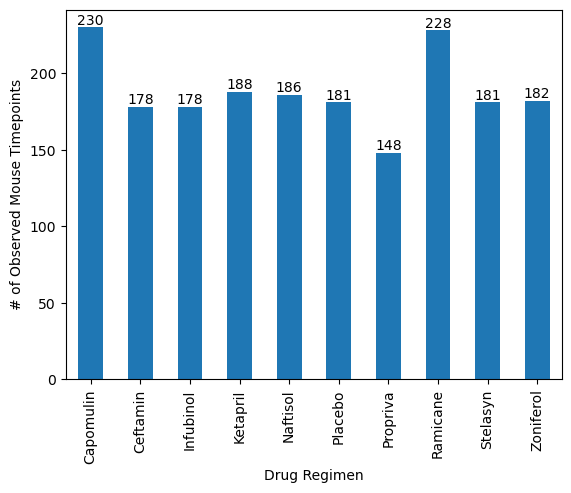

In [9]:
#Bar plot Mouse ID vs Timepoints 
#Bar chart with pandad dataframe.plot()

bar_plot=mice_study.groupby('Drug Regimen')['Timepoint'].count().plot(kind='bar', ylabel = '# of Observed Mouse Timepoints')
bar_plot.bar_label(bar_plot.containers[0])

plt.show()

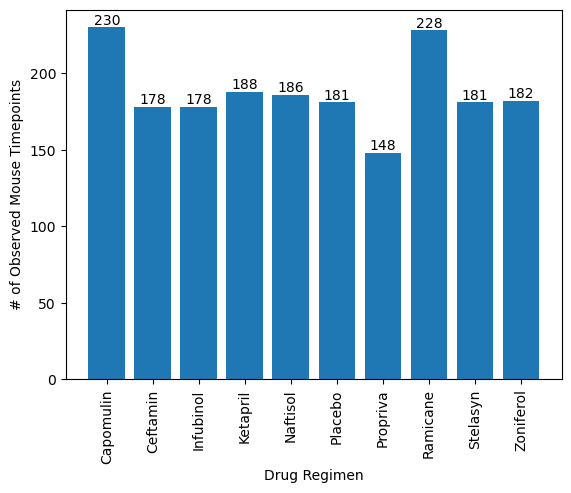

In [10]:
#Chart with matplotlib

drugr = np.sort(mice_study['Drug Regimen'].unique())

time = mice_study.groupby('Drug Regimen')['Timepoint'].count()

barplot = plt.bar(drugr,time)
plt.bar_label(barplot,labels=time, label_type ='edge')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation = 'vertical')

plt.show()

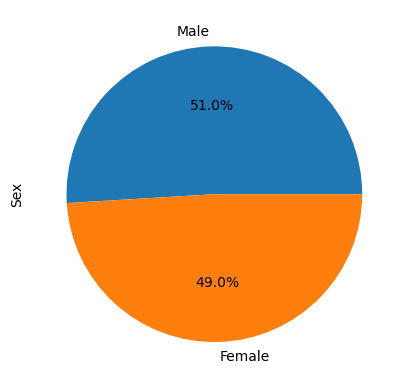

In [11]:
#Pie Charts, female vs male mice
#chart with DataFrame.plot()

mice_study['Sex'].value_counts().plot(kind='pie', labels = ['Male','Female'], autopct = '%1.1f%%')

plt.show()


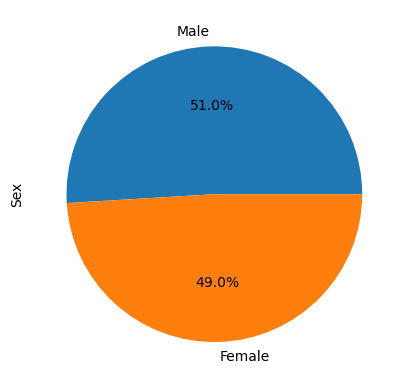

In [12]:
#Chart with pyplot

sizes= mice_study['Sex'].value_counts()

plt.pie(sizes, labels = ['Male','Female'],autopct = '%1.1f%%')
plt.ylabel('Sex', rotation= 'vertical')
plt.show()

# Calculate Quartiles, Find Outliers, and Create a Box Plot

In [13]:
#Last time point of each mouse 

last_p = pd.DataFrame(mice_study.groupby('Mouse ID')['Timepoint'].max()).reset_index()


#merge to the orginilas dataframe

df_tumorv = pd.merge(last_p,mice_study)


#list of treatments and tumor_volum
tumor_volume=[]
counts_v=[]
c=0

list_t = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

#filling the tumor_volume list 

for drug in list_t:
    for x in range(248): 
        if df_tumorv.at[x,'Drug Regimen'] == drug:
                tumor_volume.append(df_tumorv.at[x,'Tumor Volume (mm3)'])
                c=c+1
    counts_v.append(c)


In [14]:
#Determine outliers 

#the for loop will estimate the outliers for all the drugs in the list_t
for x in list_t:
    stats_ca = df_tumorv[df_tumorv['Drug Regimen']== x]['Tumor Volume (mm3)'].describe()

    q1 = stats_ca['25%']
    q3 = stats_ca['75%']

    iqr = q3-q1

    lower_bound = q1 - (iqr*1.5)
    upper_bound = q3 + (iqr*1.5)

#out will show all the outliers columns 
    out = df_tumorv[df_tumorv['Drug Regimen']== x][(df_tumorv[df_tumorv['Drug Regimen']== x]['Tumor Volume (mm3)']<lower_bound) | (df_tumorv[df_tumorv['Drug Regimen']== x]['Tumor Volume (mm3)']>upper_bound)]
    
    print(f"{x}´s potencial outliers: {out['Tumor Volume (mm3)']}")


Capomulin´s potencial outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane´s potencial outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol´s potencial outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin´s potencial outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


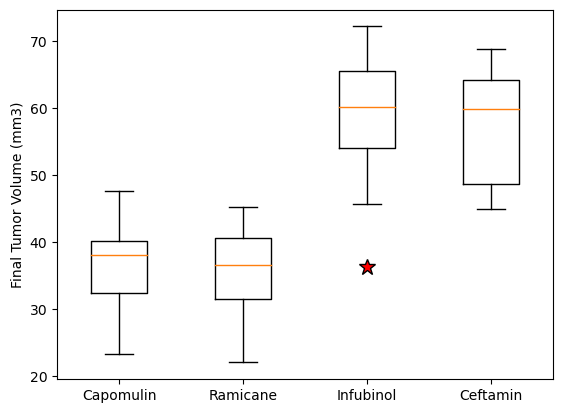

In [15]:
#Generate a box plot 

#list of data of each drug
cal = tumor_volume[0:25]
ram = tumor_volume[25:50]
infu = tumor_volume[50:75]
cefta = tumor_volume[75:100]
#creating a list of the lists for the boxplot
data= [cal,ram, infu, cefta]

#creating the boxplots
flierprops = dict(marker='*', markerfacecolor='red', markersize=12)
fig, ax = plt.subplots()
ax.boxplot(data, labels = list_t, flierprops = flierprops)
plt.ylabel('Final Tumor Volume (mm3)')

plt.show()


# Line and Scatter Plots

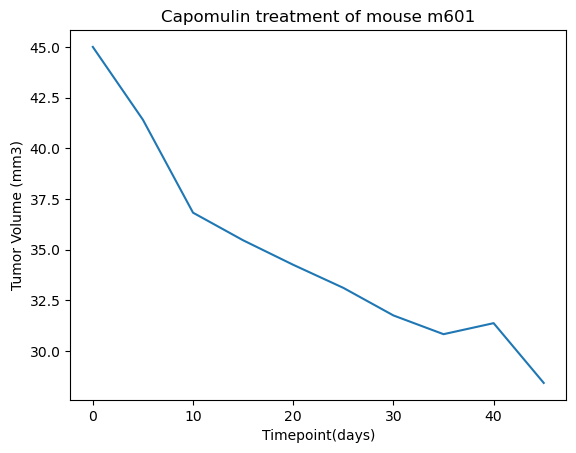

In [16]:
#Mouse treated with Capomulin, line plot tumor volume vs timepoint 
#Mouse ID selected: m601
mouse = mice_study[(mice_study['Drug Regimen']== 'Capomulin')&(mice_study['Mouse ID']== 'm601')]

plt.plot(mouse['Timepoint'],mouse['Tumor Volume (mm3)'])
plt.xlabel('Timepoint(days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse m601')

plt.show()
                                

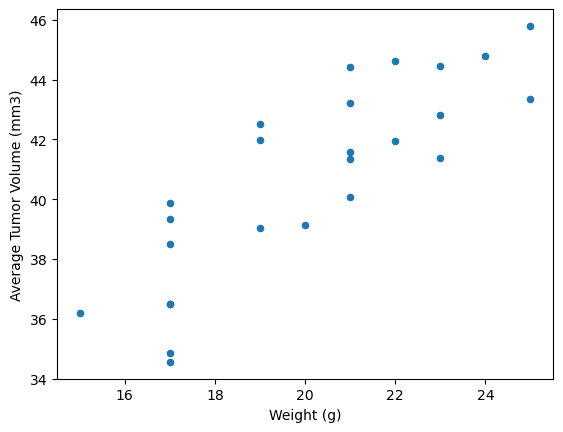

In [17]:
#scatter plot of mouse weight vs the avg observed tumor volume for the entire Capomulin regimen
#selecting only capomulin
capo= mice_study[(mice_study['Drug Regimen']== 'Capomulin')]

#creating the data frame with the avg weight and the tumor volume
df_capo= capo.groupby('Mouse ID').agg(Weight = ('Weight (g)','unique'), avrg = ('Tumor Volume (mm3)','mean'))
df_capo['Weight']= df_capo['Weight'].astype(int)
df_capo = df_capo.rename(columns={'Weight':'Weight (g)','avrg':'Average Tumor Volume (mm3)' })

#crating the plot
df_capo.plot(kind='scatter', x= 'Weight (g)', y = 'Average Tumor Volume (mm3)')

plt.show()

# Correlation and Regression

## Lineal reggression model
$$TumorVolume = b_0 + b_1 * Weight $$

In [18]:
#correlation coefficient 
correlattion = df_capo.corr().at['Average Tumor Volume (mm3)','Weight (g)']

#linear regression 
from scipy.stats import linregress
#asigando valores 
x_val = df_capo['Weight (g)']
y_val = df_capo['Average Tumor Volume (mm3)']

slope, intercept, rvalue, pvalue, stderr = linregress(x_val, y_val)

In [19]:
#Regression model
line = f'y = {round(intercept,2)} + {round(slope,2)} X'
line

'y = 21.55 + 0.95 X'

In [20]:
#creating the plot with the linear regression
y_pred = intercept + (slope* x_val)

The correlation between mouse weight and the average tumor volume is 0.84


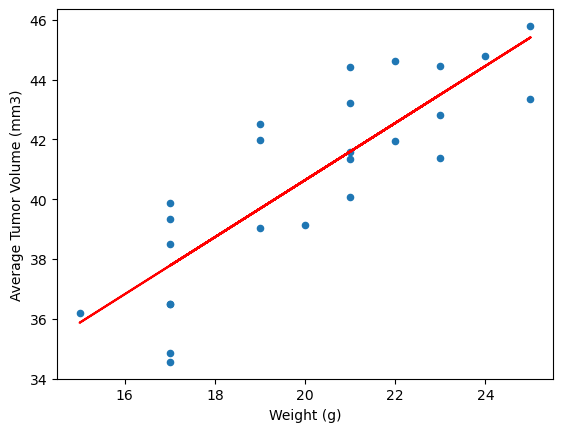

In [21]:
#scatter
df_capo.plot(kind='scatter', x= 'Weight (g)', y = 'Average Tumor Volume (mm3)')

# prints the correlation value
print(f'The correlation between mouse weight and the average tumor volume is {round(correlattion,2)}')
#puts the linear regression in the plot
plt.plot(x_val, y_pred, color='r')

plt.show()